In [40]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
path ="/content/drive/MyDrive/dataset/_Student data - Sheet1.csv"
df = pd.read_csv(path)
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


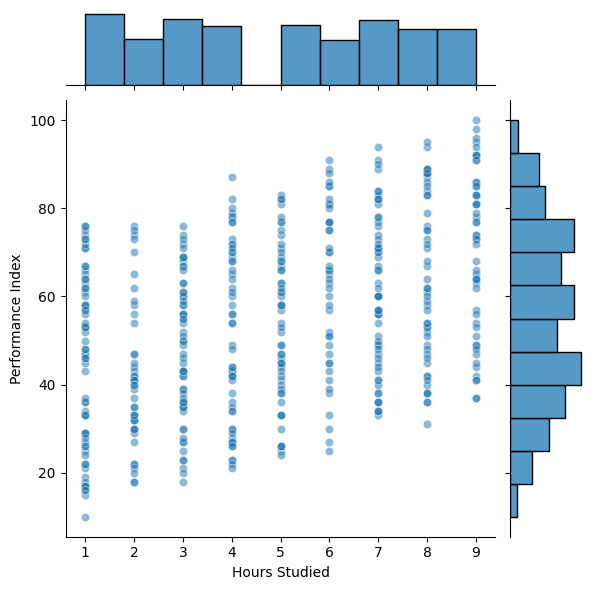

In [43]:
sns.jointplot(x='Hours Studied',y='Performance Index',data=df,alpha=0.5)

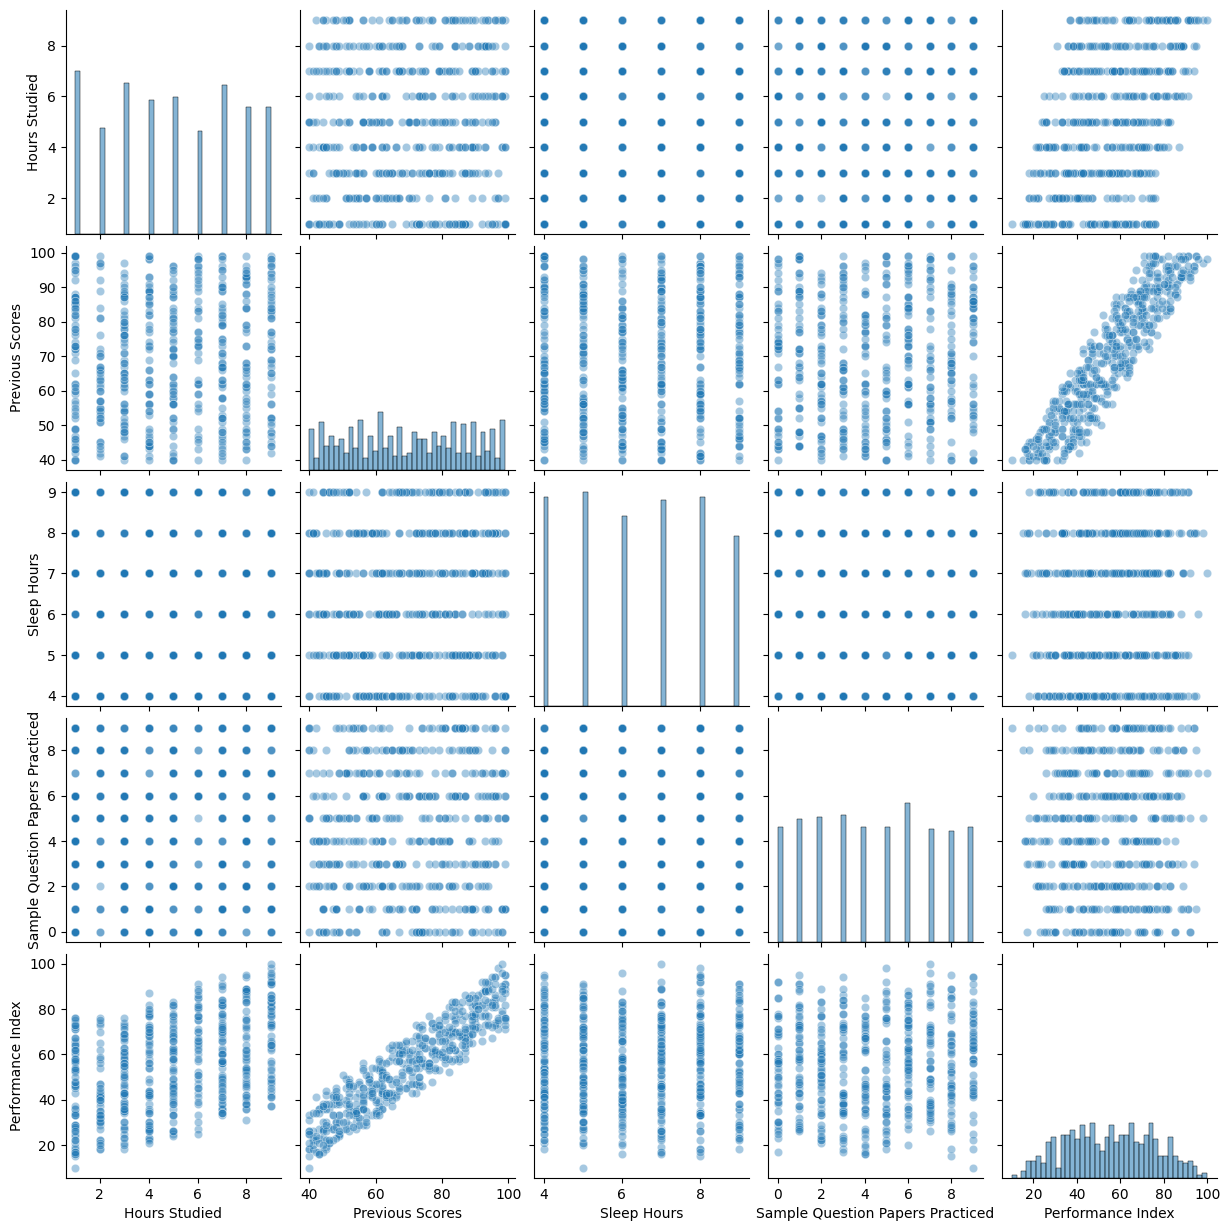

In [44]:
sns.pairplot(df,
             kind='scatter',
             plot_kws={'alpha':0.4},
             diag_kws={'alpha':0.55,'bins':40})

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x=df[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']]
y=df['Performance Index']

In [47]:
x.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5


In [48]:
y.head()


0    91
1    65
2    45
3    36
4    66
Name: Performance Index, dtype: int64

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [50]:
print(x_train.shape)

(349, 4)


In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
lr.coef_

array([2.85712509, 1.01931226, 0.42112405, 0.22171198])

In [55]:
y_pred=lr.predict(x_test)

In [56]:
print(y_pred)

[55.31641169 54.51171729 89.32457751 47.66803842 70.32026665 66.81465903
 46.23464825 87.62058067 63.00232216 70.16122403 56.66618423 26.15513228
 89.87951755 48.68590307 57.08730828 73.34740976 68.50050686 40.69186373
 67.00982421 44.14862464 51.13184548 61.76694443 75.41402869 78.84134758
 48.82121465 76.91428711 85.69212057 90.74266592 32.04929386 91.87074297
 65.12741156 62.11267498 62.34428035 44.56265456 14.06007987 88.50462934
 34.18001328 70.72049041 46.623579   60.46042008 55.80728273 71.53194483
 48.63850397 36.43045639 91.25305411 72.68227382 38.02565695 56.68423727
 71.90842107 57.1584714  53.38648749 22.16573125 75.16856918 53.76021244
 30.76645256 63.9338344  47.89539691 24.0538384  47.4756725  43.28402865
 56.75400076 64.12755197 81.52280813 26.82166785 81.04038286 71.73980267
 42.52822894 76.31613039 43.38997768 44.92247739 81.36944351 36.85722695
 19.28910551 63.00941629 64.59757071 23.91709569 61.29842129 15.10174003
 33.80353704 55.80443549 45.0368722  30.19061225 85

Text(0.5, 0, 'Actual value')

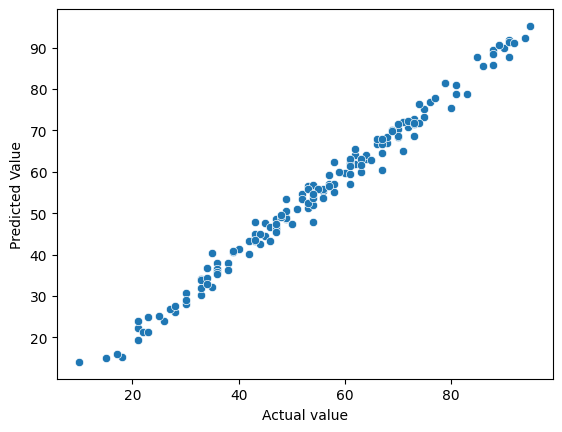

In [57]:
sns.scatterplot(x=y_test,y=y_pred)
plt.ylabel('Predicted Value')
plt.xlabel('Actual value')


In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [59]:
residual = y_test-y_pred
print(residual)

460    0.683588
73    -2.511717
231   -1.324578
175   -2.668038
237   -0.320267
         ...   
193    0.987743
5      1.472444
116   -1.979656
45    -0.718175
16    -0.852072
Name: Performance Index, Length: 150, dtype: float64


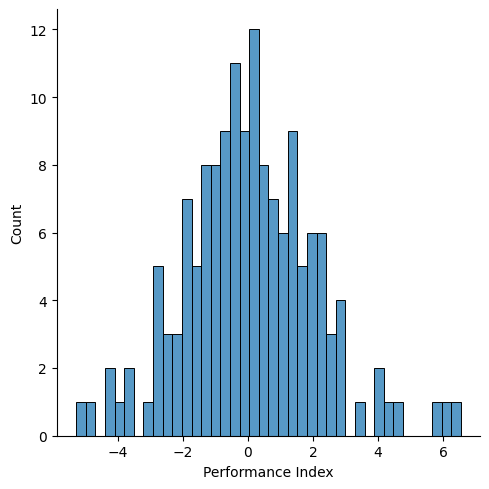

In [60]:
sns.displot(residual,bins=40)